In [1]:
# ####################################################
# ####################################################
# # 한글폰트를 받기 위한 작업
# # 한 번 실행하고 세션 다시 시작하고 실행하기


# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 1 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (4,306 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 117528 files and direc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치한 나눔고딕 폰트 경로 지정
# 폰트 설치 시 경로는 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' 입니다.
# 만약 경로가 다르면 실제 설치된 경로를 확인해야 합니다.
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# Matplotlib의 폰트 설정을 나눔고딕으로 변경
plt.rc('font', family='NanumGothic')
# 마이너스 부호가 깨지는 것을 방지 (중요!)
plt.rcParams['axes.unicode_minus'] = False

# 이 설정이 적용되었는지 확인 (선택 사항)
print(f"현재 설정된 폰트: {plt.rcParams['font.family']}")

현재 설정된 폰트: ['NanumGothic']


In [8]:
df_직장인구 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/잡아용/raw data/서울의 데이터/하나도 안 건든 것들/서울시 상권분석서비스(소득소비-행정동).csv', encoding='cp949')

df_직장인구


,기준_년분기_코드,행정동_코드,행정동_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
0,20253,11740700,둔촌2동,3414406,7,4506159000,784969000,83869000,136089000,569119000,868999000,150756000,28047000,303222000,335144000,1245945000
1,20253,11740690,둔촌1동,3596734,7,24319000,8892000,620000,0,0,0,3587000,0,5894000,2084000,3242000
2,20253,11740685,길동,2840603,6,12816843000,3334686000,114347000,415497000,3178451000,148421000,421273000,506382000,742858000,491356000,3463572000
3,20253,11740660,성내3동,2897346,6,7999998000,1610288000,207265000,51381000,1447738000,294457000,464505000,166993000,512525000,377892000,2866954000
4,20253,11740650,성내2동,2824592,6,7327192000,1540489000,519876000,124933000,2296798000,158866000,166640000,159410000,261968000,176972000,1921240000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11470,20191,11110560,평창동,4757593,8,2271206000,673895000,34343000,11249000,239046000,172078000,135532000,33938000,134361000,70545000,766219000
11471,20191,11110550,부암동,3737869,7,944034000,161458000,20166000,3627000,98745000,54799000,89896000,5577000,107257000,10263000,392246000
11472,20191,11110540,삼청동,3772087,8,1851373000,262572000,261756000,53700000,65281000,12141000,3673000,2742000,207831000,96889000,884788000
11473,20191,11110530,사직동,5208463,9,31889341000,1238314000,158974000,60281000,586427000,188458000,169234000,293797000,1241791000,23670438000,4281627000


In [ ]:
11350612 in df_직장인구['행정동_코드'].values


False

In [ ]:
import pandas as pd
import gc

# 1. 공통 경로 및 키 설정
path_base = '/content/drive/MyDrive/Colab Notebooks/잡아용/raw data/서울의 데이터/하나도 안 건든 것들/'
keys = ['기준_년분기_코드', '행정동_코드']

def load_and_diet(filename, use_cols):
    full_path = path_base + filename
    print(f"읽어오는 중: {filename}...")
    df = pd.read_csv(full_path, encoding='cp949')
    # 2024년 데이터만 필터링
    df = df[df['기준_년분기_코드'].astype(str).str.startswith('2024')]
    return df[use_cols]

# 2. 모든 데이터 다이어트 로드
df_sales = load_and_diet('서울시 상권분석서비스(추정매출-행정동)_2024년.csv',
                         keys + ['행정동_코드_명', '서비스_업종_코드_명', '당월_매출_금액', '당월_매출_건수'])
df_income = load_and_diet('서울시 상권분석서비스(소득소비-행정동).csv', keys + ['월_평균_소득_금액', '지출_총금액'])
df_work = load_and_diet('서울시 상권분석서비스(직장인구-행정동).csv', keys + ['총_직장_인구_수'])
df_resident = load_and_diet('서울시 상권분석서비스(상주인구-행정동).csv', keys + ['총_상주인구_수'])
df_road = load_and_diet('서울시 상권분석서비스(길단위인구-행정동).csv', keys + ['총_유동인구_수'])

# [추가] 점포 데이터: 경쟁 정도와 생존 지표
df_store = load_and_diet('서울시 상권분석서비스(점포-행정동).csv', keys + ['서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '개업_율', '폐업_률'])

# [추가] 집객시설 데이터: 상권의 핵심 파워 (역, 병원 등)
df_facility = load_and_diet('서울시 상권분석서비스(집객시설-행정동).csv', keys + ['집객시설_수'])

# 3. 순차적 병합 (Merge)
print("데이터 병합 시작...")
df_total = pd.merge(df_sales, df_income, on=keys, how='left')
df_total = pd.merge(df_total, df_work, on=keys, how='left')
df_total = pd.merge(df_total, df_resident, on=keys, how='left')
df_total = pd.merge(df_total, df_road, on=keys, how='left')
df_total = pd.merge(df_total, df_facility, on=keys, how='left')

# 점포 데이터는 '업종'이 기준이므로 서비스_업종_코드_명까지 포함해서 결합
df_total = pd.merge(df_total, df_store, on=keys + ['서비스_업종_코드_명'], how='left')

# 4. 메모리 정리
del df_sales, df_income, df_work, df_resident, df_road, df_store, df_facility
gc.collect()

print("--- 모든 데이터 통합 완료 ---")
df_total

읽어오는 중: 서울시 상권분석서비스(추정매출-행정동)_2024년.csv...
읽어오는 중: 서울시 상권분석서비스(소득소비-행정동).csv...
읽어오는 중: 서울시 상권분석서비스(직장인구-행정동).csv...
읽어오는 중: 서울시 상권분석서비스(상주인구-행정동).csv...
읽어오는 중: 서울시 상권분석서비스(길단위인구-행정동).csv...
읽어오는 중: 서울시 상권분석서비스(점포-행정동).csv...
읽어오는 중: 서울시 상권분석서비스(집객시설-행정동).csv...
데이터 병합 시작...
--- 모든 데이터 통합 완료 ---


,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,월_평균_소득_금액,지출_총금액,총_직장_인구_수,총_상주인구_수,총_유동인구_수,집객시설_수,점포_수,유사_업종_점포_수,개업_율,폐업_률
0,20241,11110515,청운효자동,한식음식점,3282036149,102492,3780222,936122000,5377.0,11328,3586210,93,73,73,3,3
1,20241,11110515,청운효자동,일식음식점,315907116,11835,3780222,936122000,5377.0,11328,3586210,93,18,19,11,11
2,20241,11110515,청운효자동,양식음식점,2582745698,49217,3780222,936122000,5377.0,11328,3586210,93,51,51,6,2
3,20241,11110515,청운효자동,제과점,548138245,41460,3780222,936122000,5377.0,11328,3586210,93,21,22,0,9
4,20241,11110515,청운효자동,치킨전문점,78178614,2965,3780222,936122000,5377.0,11328,3586210,93,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67895,20244,11740700,둔촌2동,가구,90470262,115,3414406,4450126000,2489.0,24228,6665385,129,9,9,0,0
67896,20244,11740700,둔촌2동,철물점,294414379,2346,3414406,4450126000,2489.0,24228,6665385,129,6,6,0,0
67897,20244,11740700,둔촌2동,인테리어,826587727,10872,3414406,4450126000,2489.0,24228,6665385,129,17,17,0,0
67898,20244,11740700,둔촌2동,조명용품,5705154,412,3414406,4450126000,2489.0,24228,6665385,129,10,10,0,0


In [ ]:
df_total.isnull().sum()

,0
기준_년분기_코드,0
행정동_코드,0
행정동_코드_명,0
서비스_업종_코드_명,0
당월_매출_금액,0
당월_매출_건수,0
월_평균_소득_금액,0
지출_총금액,0
총_직장_인구_수,785
총_상주인구_수,0


In [ ]:


# 1. 매출 데이터에는 있는데 직장인구 데이터에는 없는 행정동 코드 찾기

df_추정매출 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/잡아용/raw data/서울의 데이터/하나도 안 건든 것들/서울시 상권분석서비스(추정매출-행정동)_2024년.csv', encoding='cp949')
df_직장인 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/잡아용/raw data/서울의 데이터/하나도 안 건든 것들/서울시 상권분석서비스(직장인구-행정동).csv', encoding='cp949')

sales_dongs = set(df_추정매출['행정동_코드'].unique())
work_dongs = set(df_직장인['행정동_코드'].unique())

missing_dongs = sales_dongs - work_dongs
print(f"직장인구 데이터에 없는 행정동 코드 개수: {len(missing_dongs)}개")
missing_dongs

직장인구 데이터에 없는 행정동 코드 개수: 10개


{np.int64(11350612),
 np.int64(11470670),
 np.int64(11500604),
 np.int64(11530520),
 np.int64(11530800),
 np.int64(11680720),
 np.int64(11680740),
 np.int64(11710647),
 np.int64(11710720),
 np.int64(11740590)}

In [ ]:
# 행정동별 평균 직장인구로 결측치 대체
df_total['총_직장_인구_수'] = df_total['총_직장_인구_수'].fillna(df_total.groupby('행정동_코드')['총_직장_인구_수'].transform('mean'))

# 만약 그래도 남은 결측치(데이터가 아예 없는 동네)는 0으로 마무리
df_total['총_직장_인구_수'] = df_total['총_직장_인구_수'].fillna(0)

df_total.isnull().sum()

,0
기준_년분기_코드,0
행정동_코드,0
행정동_코드_명,0
서비스_업종_코드_명,0
당월_매출_금액,0
당월_매출_건수,0
월_평균_소득_금액,0
지출_총금액,0
총_직장_인구_수,0
총_상주인구_수,0


In [ ]:
# 1단계: 외식업 데이터만 필터링 및 전처리
# 먼저 전체 데이터에서 외식업에 해당하는 업종만 골라내고, 모델이 학습할 수 있도록 결측치와 숫자를 정리합니다.

import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. 외식업 업종 리스트 (서울시 데이터 기준 일반적인 외식업 구분)
# 데이터셋의 '서비스_업종_코드_명'을 확인하여 외식업만 추출합니다.
food_sectors = ['한식음식점', '중식음식점', '일식음식점', '양식음식점', '제과점',
                '패스트푸드점', '치킨전문점', '분식전문점', '호프-간이주점', '커피-음료']

df_food = df_total[df_total['서비스_업종_코드_명'].isin(food_sectors)].copy()

# 2. 결측치 처리 (직장인구 등 NaN을 0으로 채움)
df_food = df_food.fillna(0)

# 3. 모델에 넣을 독립변수(X)와 종속변수(y) 설정
features = [
    '월_평균_소득_금액', '총_직장_인구_수', '총_상주인구_수',
    '총_유동인구_수',
    '집객시설_수', '점포_수', '폐업_률'
]

# 업종명은 문자열이므로 '숫자'로 바꿔줘야 모델이 인식합니다 (One-Hot Encoding)
X = pd.get_dummies(df_food[features + ['서비스_업종_코드_명']], columns=['서비스_업종_코드_명'])
y = df_food['당월_매출_금액']

# 4. 매출액 단위가 너무 크므로 로그 변환 (학습 안정성을 위해)
y_log = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [ ]:
# 모델 생성
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

# 학습 시작
model.fit(X_train, y_train)

# 예측 및 복원 (로그를 다시 실제 금액으로)
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

print(f"행정동 기준 평균 절대 오차(MAE): {mean_absolute_error(y_true, y_pred):,.0f}원")
print(f"결정계수(R2 Score): {r2_score(y_test, y_pred_log):.4f}")

행정동 기준 평균 절대 오차(MAE): 415,206,106원
결정계수(R2 Score): 0.8640


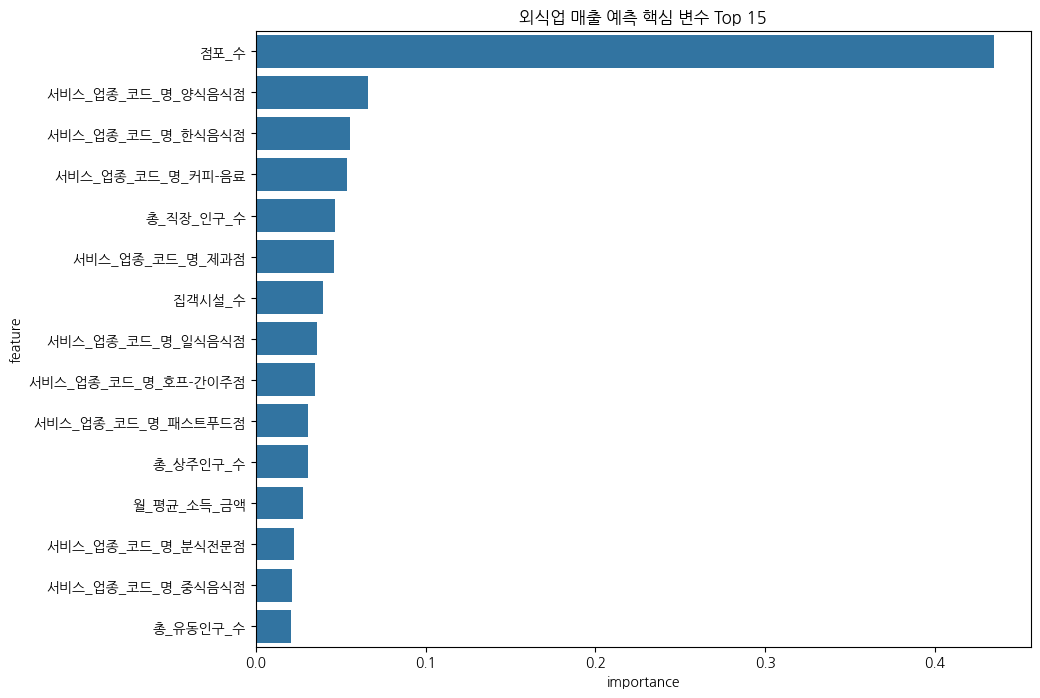

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 변수 중요도 추출
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importances.head(15))
plt.title('외식업 매출 예측 핵심 변수 Top 15')
plt.show()

In [ ]:
# 1. 점포당 평균 매출 컬럼 생성
# 점포 수가 0인 경우 에러가 날 수 있으므로 0보다 큰 경우만 계산
df_food = df_food[df_food['점포_수'] > 0].copy()
df_food['점포당_평균_매출'] = df_food['당월_매출_금액'] / df_food['점포_수']

# 2. 새로운 타겟(y) 설정 및 로그 변환
y_avg = df_food['점포당_평균_매출']
y_avg_log = np.log1p(y_avg)

# 3. 학습 데이터 분리 (X는 이전과 동일하게 사용하되 점포당 매출로 계산했으니 '점포_수'는 Feature에서 제외해봅니다)
# 점포 수가 많을수록 총 매출은 늘지만, 점포당 매출은 줄어들 수도 있는 상관관계를 보기 위함입니다.
features_avg = [
    '월_평균_소득_금액', '총_직장_인구_수', '총_상주인구_수',
    '총_유동인구_수',
    '집객시설_수', '폐업_률'
]

X_avg = pd.get_dummies(df_food[features_avg + ['서비스_업종_코드_명']], columns=['서비스_업종_코드_명'])

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_avg, y_avg_log, test_size=0.2, random_state=42)

# 4. 모델 재학습
model_avg = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model_avg.fit(X_train_a, y_train_a)

# 5. 결과 확인
y_pred_avg_log = model_avg.predict(X_test_a)
y_pred_avg = np.expm1(y_pred_avg_log)
y_true_avg = np.expm1(y_test_a)

print(f"점포당 평균 매출 오차(MAE): {mean_absolute_error(y_true_avg, y_pred_avg):,.0f}원")
print(f"결정계수(R2 Score): {r2_score(y_test_a, y_pred_avg_log):.4f}")

점포당 평균 매출 오차(MAE): 19,854,802원
결정계수(R2 Score): 0.6824


In [ ]:
avg_sales = df_food['점포당_평균_매출'].mean()
print(f"점포당 평균 매출의 평균: {avg_sales:,.0f}원")



점포당 평균 매출의 평균: 50,049,184원


In [ ]:
df_food['점포당_평균_매출'].median()


34985762.084047616

In [ ]:
mae = mean_absolute_error(y_true_avg, y_pred_avg)

result = mae_ratio = mae / df_food['점포당_평균_매출'].mean()

print(result)

0.39670581169120717


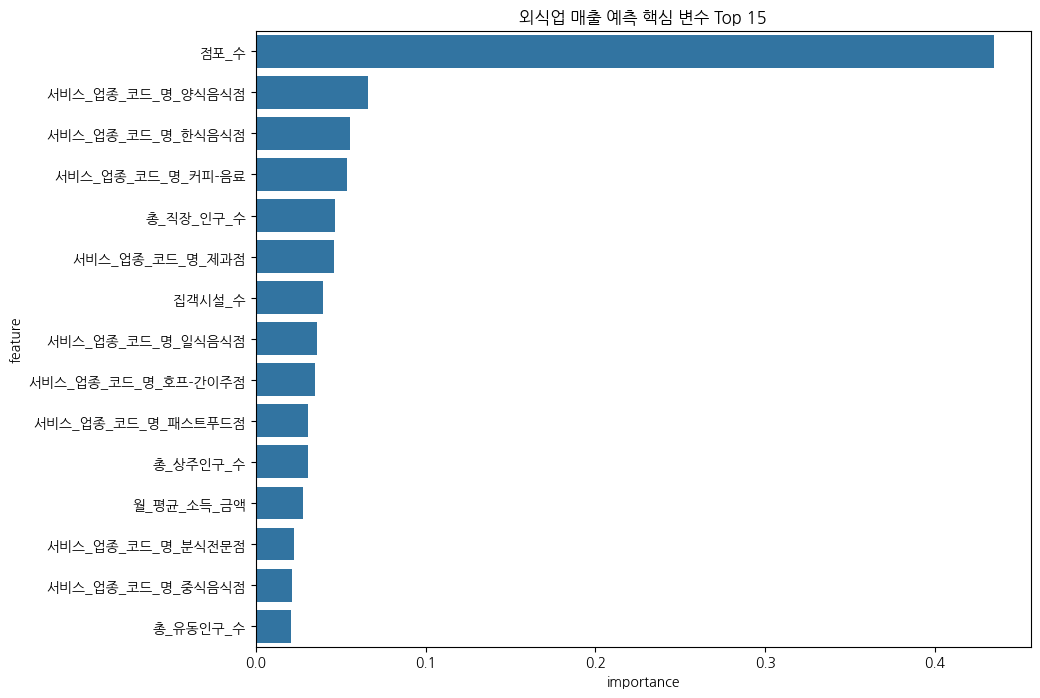

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 변수 중요도 추출
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importances.head(15))
plt.title('외식업 매출 예측 핵심 변수 Top 15')
plt.show()

/tmp/ipython-input-3525875450.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importances_avg.head(15), palette='viridis')


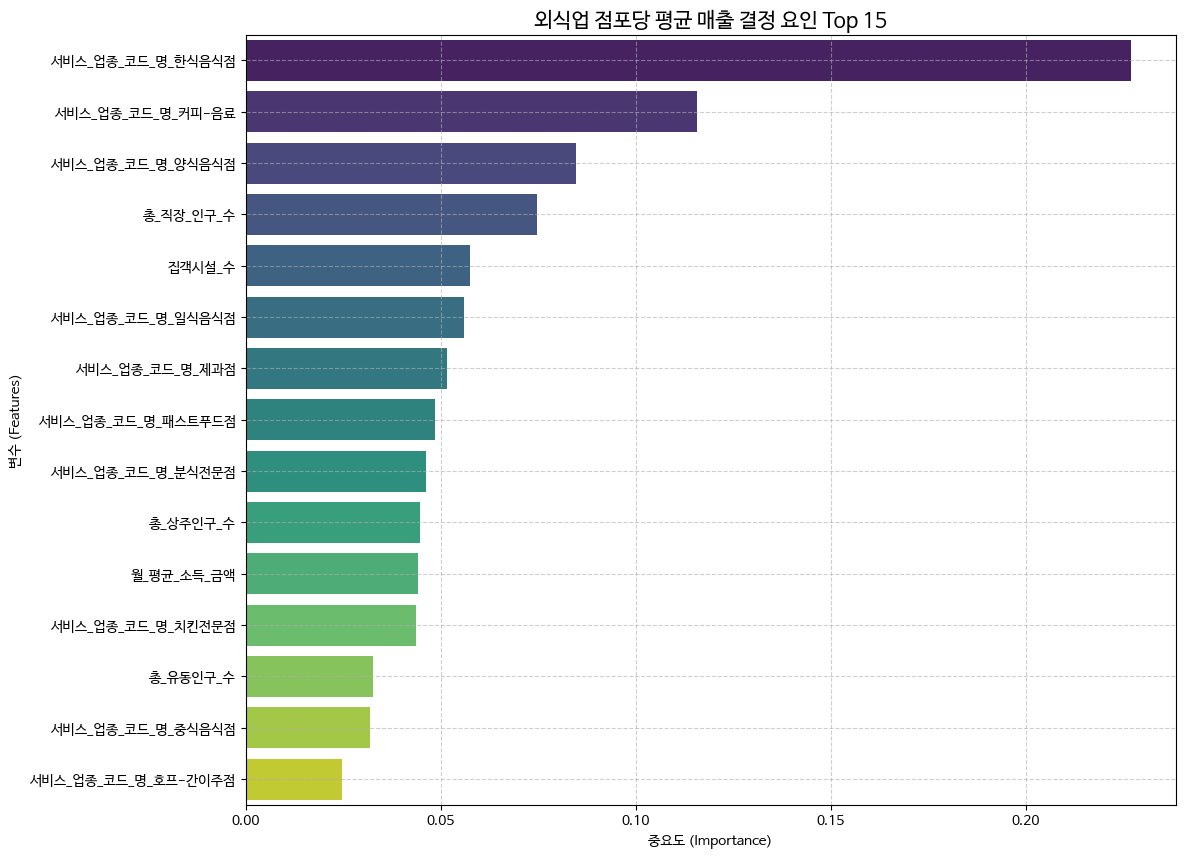

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 변수 중요도 데이터프레임 생성
# X_avg.columns는 업종 인코딩이 포함된 전체 컬럼 리스트입니다.
importances_avg = pd.DataFrame({
    'feature': X_avg.columns,
    'importance': model_avg.feature_importances_
}).sort_values(by='importance', ascending=False)

# 2. 한글 깨짐 방지 설정 (코랩 기준)
plt.rc('font', family='NanumBarunGothic')

# 3. 시각화
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=importances_avg.head(15), palette='viridis')
plt.title('외식업 점포당 평균 매출 결정 요인 Top 15', fontsize=15)
plt.xlabel('중요도 (Importance)')
plt.ylabel('변수 (Features)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# import numpy as np

# def startup_simulation():
#     print("===  외식업 창업 매출 시뮬레이터 ===")

#     # 1. 사용자 입력 받기
#     target_dong = input("1. 궁금한 동네(행정동명)를 입력하세요 (예: 역삼1동): ")
#     target_sector = input("2. 창업할 업종을 입력하세요 (예: 한식음식점, 커피-음료): ")

#     # 2. 해당 동네의 최신 상권 데이터 추출
#     # 가장 최근 분기 데이터를 기준으로 가져옵니다.
#     dong_data = df_food[df_food['행정동_코드_명'] == target_dong].sort_values(by='기준_년분기_코드', ascending=False)

#     if dong_data.empty:
#         print(f" '{target_dong}'에 대한 데이터가 없습니다. 이름을 정확히 입력했는지 확인해주세요.")
#         return

#     # 동네의 상권 특성 (첫 번째 행 사용)
#     sample_row = dong_data.iloc[0]

#     # 3. 모델 입력용 데이터프레임 구성 (Encoding 맞추기)
#     # 기존 학습에 썼던 컬럼 구조(X_avg.columns)를 그대로 복사
#     input_df = pd.DataFrame(columns=X_avg.columns)
#     input_df.loc[0] = 0  # 모든 값을 0으로 초기화

#     # 기본 상권 변수 채우기
#     for col in features_avg:
#         if col in sample_row:
#             input_df[col] = sample_row[col]

#     # 업종 원-핫 인코딩 적용
#     sector_col = f'서비스_업종_코드_명_{target_sector}'
#     if sector_col in input_df.columns:
#         input_df[sector_col] = 1
#     else:
#         available_sectors = [c.replace('서비스_업종_코드_명_', '') for c in X_avg.columns if '서비스_업종_코드_명_' in c]
#         print(f" '{target_sector}' 업종 데이터가 없습니다. 가능한 업종: {available_sectors}")
#         return

#     # 4. 매출 예측 (로그 변환 복원)
#     pred_log = model_avg.predict(input_df)
#     predicted_sales = np.expm1(pred_log)[0]

#     # 5. 결과 리포트 출력
#     print("\n" + "="*40)
#     print(f" 분석 상권: {target_dong}")
#     print(f" 선택 업종: {target_sector}")
#     print("-" * 40)
#     print(f" [예상 점포당 월 평균 매출]: {predicted_sales:,.0f}원")
#     print(f" (오차 범위: ±19,854,802원)")
#     print("-" * 40)
#     print(f" 해당 상권의 핵심 지표:")
#     print(f"   - 월 평균 소득: {sample_row['월_평균_소득_금액']:,.0f}원")
#     print(f"   - 총 직장인 수: {sample_row['총_직장_인구_수']:,.0f}명")
#     print(f"   - 집객 시설 수: {sample_row['집객시설_수']:.0f}개")
#     print(f"   - 상권 내 폐업률: {sample_row['폐업_률']:.1f}%")
#     print("="*40)

# # 시뮬레이션 실행
# startup_simulation()

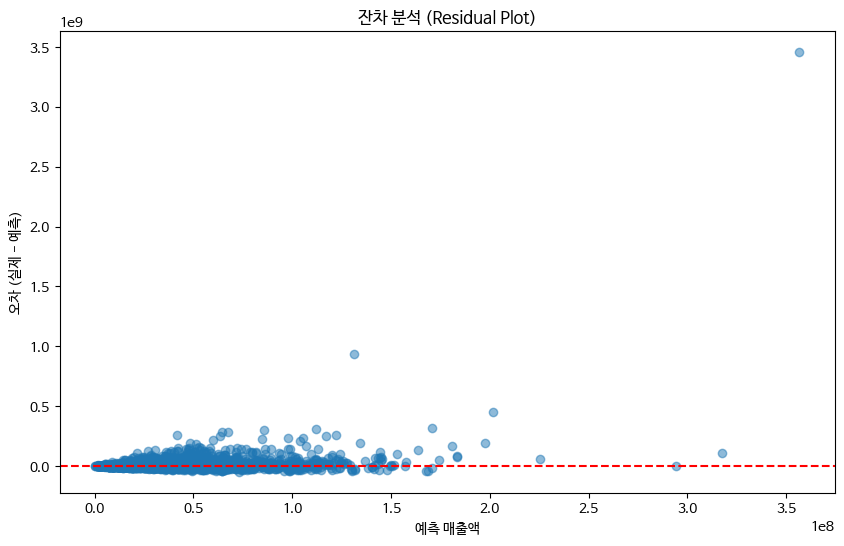

In [ ]:
## 검증 분석을 위한 잔차 분석

import matplotlib.pyplot as plt

# 예측값과 실제값 사이의 오차(잔차) 계산
residuals = y_true_avg - y_pred_avg

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_avg, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('잔차 분석 (Residual Plot)')
plt.xlabel('예측 매출액')
plt.ylabel('오차 (실제 - 예측)')
plt.show()

In [ ]:
def startup_simulation_with_reason():
    print("===  외식업 창업 매출 및 원인 분석 시뮬레이터 ===")

    # 1. 사용자 입력
    target_dong = input("1. 궁금한 동네(행정동명)를 입력하세요: ")
    target_sector = input("2. 창업할 업종을 입력하세요: ")

    # 2. 데이터 추출
    dong_data = df_food[df_food['행정동_코드_명'] == target_dong].sort_values(by='기준_년분기_코드', ascending=False)
    if dong_data.empty:
        print(" 데이터를 찾을 수 없습니다."); return

    sample_row = dong_data.iloc[0]

    # 3. 전체 평균 데이터 (비교용)
    avg_data = df_food.mean(numeric_only=True)

    # 4. 매출 예측 (기존 로직)
    input_df = pd.DataFrame(columns=X_avg.columns)
    input_df.loc[0] = 0
    for col in features_avg:
        if col in sample_row: input_df[col] = sample_row[col]

    sector_col = f'서비스_업종_코드_명_{target_sector}'
    if sector_col in input_df.columns: input_df[sector_col] = 1
    else: print(" 업종 오류"); return

    pred_log = model_avg.predict(input_df)
    predicted_sales = np.expm1(pred_log)[0]

    # 5. 원인 분석 로직
    reasons = []
    # 직장인구 분석
    if sample_row['총_직장_인구_수'] > avg_data['총_직장_인구_수'] * 1.5:
        reasons.append(f" **직장인구**가 서울시 평균보다 압도적으로 많아 평일 및 점심 수요가 강력합니다.")
    # 소득 수준 분석
    if sample_row['월_평균_소득_금액'] > avg_data['월_평균_소득_금액'] * 1.2:
        reasons.append(f" 지역 주민 및 이용객의 **소득 수준**이 높아 고단가 메뉴 판매에 유리합니다.")
    # 유동인구 분석
    if sample_row['총_유동인구_수'] > avg_data['총_유동인구_수']:
        reasons.append(f" **유동인구**가 풍부하여 뜨내기 고객 및 브랜드 노출 효과가 좋습니다.")
    # 집객시설 분석
    if sample_row['집객시설_수'] > avg_data['집객시설_수']:
        reasons.append(f" 주변에 **주요 시설(역, 관공서 등)**이 밀집되어 있어 인구 집객력이 우수합니다.")
    # 폐업률 경고
    if sample_row['폐업_률'] > avg_data['폐업_률']:
        reasons.append(f" 다만, 해당 지역의 **폐업률**이 평균보다 높아 경쟁이 매우 치열한 상권입니다.")

    # 6. 결과 출력
    print("\n" + "="*50)
    print(f" 상권: {target_dong} |  업종: {target_sector}")
    print(f" 예상 점포당 월 매출: **{predicted_sales:,.0f}원**")
    print("-" * 50)
    print(" [AI 모델의 매출 근거 요약]")
    if not reasons:
        print("이 상권은 서울시 평균 수준의 지표를 보이고 있습니다.")
    for r in reasons:
        print(r)
    print("="*50)

# 실행
startup_simulation_with_reason()

===  외식업 창업 매출 및 원인 분석 시뮬레이터 ===
1. 궁금한 동네(행정동명)를 입력하세요: 역삼1동
2. 창업할 업종을 입력하세요: 치킨전문점

 상권: 역삼1동 |  업종: 치킨전문점
 예상 점포당 월 매출: **111,660,480원**
--------------------------------------------------
 [AI 모델의 매출 근거 요약]
 **직장인구**가 서울시 평균보다 압도적으로 많아 평일 및 점심 수요가 강력합니다.
 **유동인구**가 풍부하여 뜨내기 고객 및 브랜드 노출 효과가 좋습니다.
 주변에 **주요 시설(역, 관공서 등)**이 밀집되어 있어 인구 집객력이 우수합니다.
 다만, 해당 지역의 **폐업률**이 평균보다 높아 경쟁이 매우 치열한 상권입니다.


In [ ]:
# import joblib

# # 1. 모델 저장
# joblib.dump(model_avg, 'revenue_model.pkl')

# # 2. 학습 시 사용된 컬럼 순서 저장 (이게 어긋나면 예측값이 엉망이 됨)
# joblib.dump(X_avg.columns.tolist(), 'model_columns.pkl')

# # 3. 행정동별 상권 지표 데이터 저장
# # (FastAPI가 이 파일을 보고 해당 동네의 인구수를 조회할 용도)
# df_food.to_pickle('dong_data.pkl')

# print("파일 저장 완료! 왼쪽 파일 탐색기에서 다운로드하세요.")